In [1]:
%load_ext autoreload
%autoreload 2
import os
import scipy.io
from sepia.SepiaModelSetup import setup_model
from sepia.SepiaData import SepiaData as SepiaData
import numpy as np
import sepia.SepiaPlot as SepiaPlot
import matplotlib.pyplot as plt
from nedderimp import nedderimp

mat_fn = 'neddTemp.mat'
if os.path.isfile(mat_fn):
    print('Found matfile, loading from multi_sim_and_obs_mcmc_test.mat \n')
    matfile = scipy.io.loadmat(mat_fn) # dictionary
    
design = np.array([
    [0.7714,    0.4286,    0.0286],
    [0.3714,    0.1143,    0.7143],
    [0.1714,    0.4571,    0.8857],
    [0.3429,    0.6000,    0.8000],
    [0.8000,    0.6286,    0.4000],
    [0.7429,    0.5429,         0],
    [0.6571,    1.0000,    0.6286],
    [0.2857,         0,    0.4571],
    [0.5143,    0.9429,    0.2286],
    [0.6857,    0.3143,    0.6571],
    [0.8286,    0.2000,    1.0000],
    [0.9714,    0.3429,    0.6000],
    [0.4000,    0.8000,    0.2000],
    [0.5429,    0.2857,    0.2857],
    [0.9143,    0.8857,    0.2571],
    [0.0571,    0.0286,    0.0857],
    [0.1143,    0.5714,    0.7429],
    [0.2000,    0.2286,    0.3714],
    [0.4571,    0.9143,    0.3429],
    [0.6286,    0.7143,    0.6857],
    [     0,    0.8286,    0.9429],
    [0.8857,    0.0857,    0.9714],
    [0.2286,    0.0571,    0.5714],
    [0.7143,    0.1714,    0.8571],
    [0.2571,    0.4857,    0.1429],
    [0.5714,    0.4000,    0.8286],
    [0.9429,    0.6857,    0.4857],
    [0.4857,    0.1429,    0.1143],
    [1.0000,    0.8571,    0.9143],
    [0.6000,    0.6571,    0.5143],
    [0.1429,    0.7429,    0.5429],
    [0.8571,    0.2571,    0.0571],
    [0.3143,    0.3714,    0.4286],
    [0.4286,    0.7714,    0.7714],
    [0.0286,    0.9714,    0.3143],
    [0.0857,    0.5143,    0.1714]])

m = design.shape[0]



phi_dat = matfile['phidat']
time_dat_1 = matfile['timedat1']
time_dat_2 = matfile['timedat2']
time_dat_3 = matfile['timedat3']

time_phi_dat_1 = np.column_stack( ( np.concatenate((np.ones(phi_dat.shape[1])*time_dat_1[0],\
                                   np.ones(phi_dat.shape[1])*time_dat_1[1],\
                                       np.ones(phi_dat.shape[1])*time_dat_1[2])), np.tile(phi_dat,3).T ) )
time_phi_dat_2 = np.column_stack( ( (np.ones(phi_dat.shape[1])*time_dat_2).reshape(16,1), phi_dat.T ) )
time_phi_dat_3 = np.column_stack( ( np.concatenate((np.ones(phi_dat.shape[1])*time_dat_3[0],\
                                   np.ones(phi_dat.shape[1])*time_dat_3[1])), np.tile(phi_dat,2).T ) )
time_phi_dat = [time_phi_dat_1,time_phi_dat_2,time_phi_dat_3]
 
sim_time = matfile['time']
sim_phi  = matfile['phi']    
y_sim_ind_time_phi = np.zeros((22*26,2))
y_sim_ind_time_phi[:,0] = np.repeat(sim_time,26)
y_sim_ind_time_phi[:,1] = np.tile(sim_phi,22)
x_sim = design[:,0].reshape(m,1)
y_sim = matfile['ye'].T
#t_sim = matfile['paramslhs']
t_sim = design[:,1:3]


x_obs = matfile['xdat'].T # mass of HE by experiement

y_obs = [matfile['ydat1'].flatten('F'),matfile['ydat2'].flatten('F'),matfile['ydat3'].flatten('F')]
y_ind_obs = [time_phi_dat_1,time_phi_dat_2,time_phi_dat_3]
                    
data = SepiaData(x_sim = x_sim,t_sim = t_sim,y_sim = y_sim,y_ind_sim = y_sim_ind_time_phi,\
                 x_obs = x_obs, y_obs = y_obs, y_ind_obs = y_ind_obs)
data.transform_xt()

Found matfile, loading from multi_sim_and_obs_mcmc_test.mat 



In [2]:
# these parameter values simulate expt 10 in Neddermeyer '43
# params = [R1 lam s rho mratio u0]
#params10 = np.c_[1.5*2.54, 2/3, 3e5*6.84e4, 7.5, .32, 1.65e10]
#paramslhs = np.zeros((36, 6))
#for i in range(design.shape[1]):#
#    paramslhs[i,:] = params10*np.array([1, 1, design[i,1]*.2+.9, 1, design[i,0]*.65+.5, design[i,2]*.2+.9])

# the computer runs will vary mratio from .32*[.5 to 1.15]
#                             s      from s0*[.9 to 1.1]
#                             u0     from u0*[.9 to 1.1]

#tend = 5.0e-5; nt = 21;
#time = np.c_[np.linspace(0,tend,nt,endpoint=True)]
#rinner = nedderimp(time,params10);
#lam = params10[2]; R1 = params10[1];
#router = np.sqrt(rinner**2 + 1 - lam**2);
#phi = np.arange(0,1.04,.04) * 2*np.pi;
#xcirc = np.cos(phi);
#ycirc = np.sin(phi);
#r = nedderimp(time,params10);
#%%%% a plot of the implosion over time
#% plot of cylinder for 10 frames
#if doPlot
#figure(1)
#tframes=round(1:((nt-1)/10):nt);
#for i=1:10
#    it = tframes(i);
#    D2subplot(i,2,5,[.5 .08 .05 .02],[0 0 0 0])
#%    plot(xcirc*rinner(it)*R1,ycirc*rinner(it)*R1,'r',...
#%         xcirc*router(it)*R1,ycirc*router(it)*R1,'b');
#    patch(xcirc*router(it)*R1,ycirc*router(it)*R1,[.6 .6 .6]);
#    patch(xcirc*rinner(it)*R1,ycirc*rinner(it)*R1,[1 1 1]);
#
#         set(gca,'Xtick',[]); set(gca,'Ytick',[]); ylabel('');
#         if(i==1) || (i==6)
#             set(gca,'Ytick',[-2 0  2 ]);
#             ylabel('cm');
#         end
#         axis equal; axis([-1 1 -1 1]*R1*1.2); 
#         xlabel(''); hold on;
#    %plotdome([2.2 1.9 1.6 1.3 ]',6,rinner(it)*R1); 
#    plot(time(1:it)/(6e-5)*6-4,repmat(-4.2,[it 1]),'g','LineWidth',4);
#    text(-4:1:1,repmat(-3.9,[1 6]),{'0','1','2','3','4','X 10^{-5} s'},'FontSize',7)
#    hold off;
#end
#end

In [3]:
#%% K basis

# sim
ysimmean = np.mean(y_sim,0)
ysimsd = np.std(y_sim)
ysimStd = (y_sim - np.tile(ysimmean,m).reshape(y_sim.shape))/ysimsd
data.sim_data.orig_y_mean = ysimmean
data.sim_data.orig_y_sd = ysimsd
data.sim_data.y_std = ysimStd
# now represent ye images using eof's
U, s, V = np.linalg.svd(ysimStd.T, full_matrices=False)
numPC = 3
data.sim_data.K = U[:,0:numPC]*s[0:numPC]/np.sqrt(m)
data.sim_data.K = data.sim_data.K.T

# obs
n = 3 # number of experiments
phi = matfile['phi']
time = matfile['time']
phimat = np.repeat(phi,time.shape[0]).reshape((time.shape[0],phi.shape[1]),order='F')
timemat = np.repeat(time,phi.shape[1]).reshape((time.shape[0],phi.shape[1]))
# compute simulator mean values simdat.ymean interpolated to the data values...
interp_func = scipy.interpolate.interp2d(phimat[0,:],timemat[:,0],data.sim_data.orig_y_mean.reshape((22,26),order='F'))
data.obs_data.orig_y_mean = []
data.obs_data.orig_y_sd = []
for k in range(n):
    ymk = interp_func(np.unique(data.obs_data.y_ind[k][:,1]),np.unique(data.obs_data.y_ind[k][:,0]))                                                                             
    data.obs_data.orig_y_mean.append(ymk.flatten())
    data.obs_data.orig_y_sd.append(data.sim_data.orig_y_sd)

# now compute the centered, scaled observed arrival times yStd
data.obs_data.y_std = []
for k in range(n):
    data.obs_data.y_std.append((data.obs_data.y[k] - data.obs_data.orig_y_mean[k])/data.sim_data.orig_y_sd)

data.obs_data.K = []
for k in range(n):
    data.obs_data.K.append(np.zeros((data.obs_data.y_std[k].shape[0], numPC)))
    for j in range(numPC):
        f = scipy.interpolate.interp2d(phimat[0,:],timemat[:,0],np.reshape(data.sim_data.K[j,:],(22,26),order='F'))
        data.obs_data.K[k][:,j] = f(data.obs_data.y_ind[k][:,1],data.obs_data.y_ind[k][:,0])[:,0]

for k in range(n):
    data.obs_data.K[k] = data.obs_data.K[k].T

In [4]:
#%% D basis
def dist2pi(x1,x2):
    # computes the distance assuming periodicity: 2pi=0
    # x1 and x2 are vectors with common length and values
    # between 0 and 2pi
    d = abs(x1-x2)
    iwrap = d > np.pi
    d[iwrap] = 2*np.pi - d[iwrap]
    return(d)
def dnorm(x,mu,scale):  
    # normal density in 1-d. 
    # It is scaled so that the 1-d integral is 1
    # mu and scale are scalars, x is an array...
    out=np.zeros(len(x))
    u=abs(x-mu)/scale
    out = (1.0/(np.sqrt(2*np.pi)*scale)) * np.exp(-.5 * u**2)
    return(out)

# compute the basis functions for the discrepancy function.  Each data set
# will get a obsData(k).n x pdelta matrix of basis functions.  
phiknots = np.arange(0,2*np.pi-.1,2*np.pi/8)
pphiknots = len(phiknots)
#Ddelt = zeros([ndat1 pphiknots]);
Dsim  = np.zeros((phi.shape[1], pphiknots))
for k in range(pphiknots):
    #Ddelt(:,k) = dnorm(dist2pi(phidat,phiknots(k)*ones(size(phidat))),0,pi/8)';
    x = dist2pi(phi,phiknots[k]*np.ones(phi.shape[1])).flatten()
    Dsim[:,k] = dnorm(x=x,mu=0,scale=np.pi/8)


dknots = np.expand_dims(np.array([.04, -.03, .03, -.03, .02, -.03, .03, -.03]),1)*2.5
#datadelt = Ddelt*dknots;
#simdelt = Dsim*dknots

timeknots = np.linspace(0,.5,3)*1e-4
ptimeknots=len(timeknots)

data.obs_data.D = []
for k in range(n):
    knotlocstime = np.reshape(np.repeat(timeknots,pphiknots),(ptimeknots*pphiknots, 1))
    knotlocsphi = np.expand_dims(np.tile(phiknots,ptimeknots),1)
    pv = knotlocstime.shape[0]
    Dobs = np.zeros((data.obs_data.y_std[k].shape[0], pv))
    if k == 0: Dsim = np.zeros((data.sim_data.y_std.shape[1], pv))
    for j in range(pv):
        Dobs[:,j] = dnorm(time_phi_dat[k][:,0],knotlocstime[j],.25*1e-4)*\
            dnorm(dist2pi(time_phi_dat[k][:,1],knotlocsphi[j]*np.ones(time_phi_dat[k][:,1].shape[0])),0,np.pi/8)
        if k == 0:
            Dsim[:,j] = dnorm(timemat.flatten('F'),knotlocstime[j],.25*1e-4)*\
                dnorm(dist2pi(phimat.flatten('F'),knotlocsphi[j]*np.ones(len(phimat.flatten()))),0,np.pi/8)
    if k == 0: data.sim_data.D = Dsim
    data.obs_data.D.append(Dobs.T)
# now normalize Dobs and Dsim so that it gives a var=1 process
dmax = np.amax(np.amax(np.matmul(data.sim_data.D,data.sim_data.D.T)))
for k in range(n):
    data.obs_data.D[k] /= np.sqrt(dmax)
data.sim_data.D /= np.sqrt(dmax)

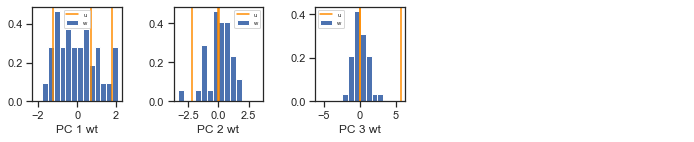

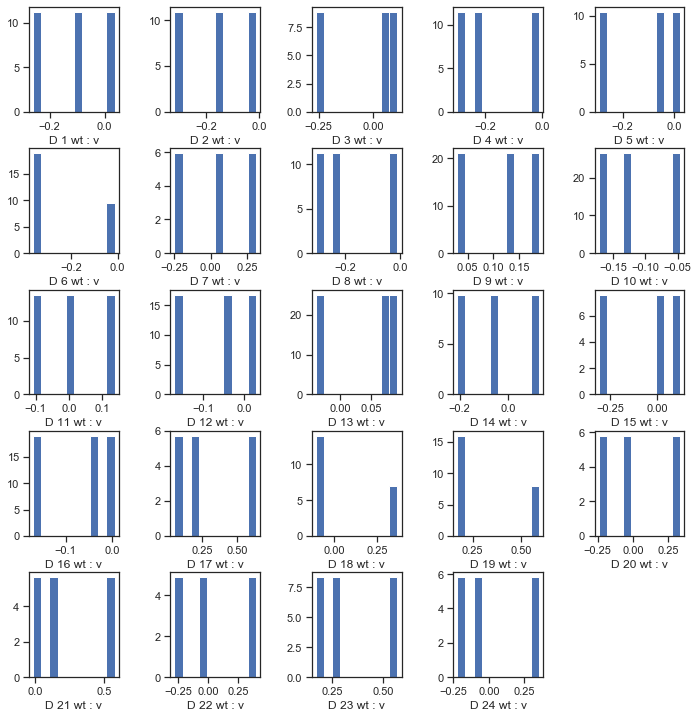

In [5]:
data.plot_K_weights()

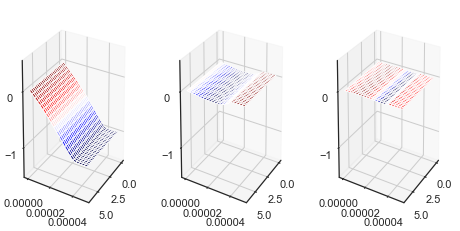

In [6]:
# plot K basis (simulation)
x,y = np.meshgrid(phi,time)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=plt.figaspect(0.5))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.plot_surface(x,y,data.sim_data.K[i,:].reshape((22,26),order='F'),cmap='seismic')
    ax.set_zlim([-1.5,.5])
    ax.view_init(20, 30)

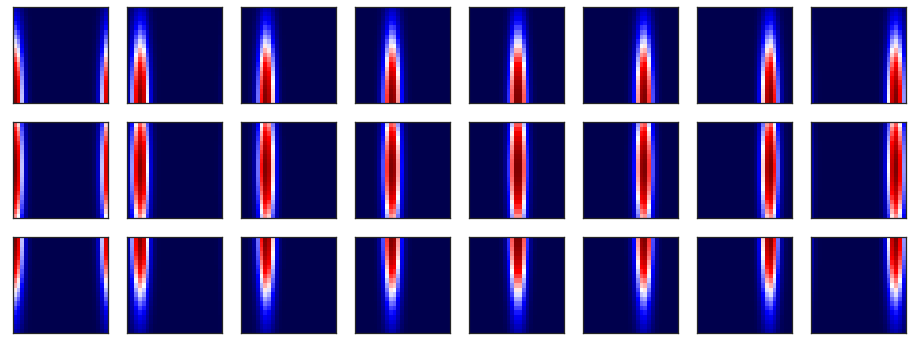

In [7]:
# plot D basis
fig, axs = plt.subplots(3,8,figsize=[16,6],sharex=True,sharey=True)
x,y = np.meshgrid(phi,time)
for i,ax in enumerate(axs.flatten()):
    ax.pcolormesh(x, y, data.sim_data.D[:,i].reshape((22,26),order='F'),cmap='seismic')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
plt.xlabel(r"angle \phi")
plt.ylabel("time")
plt.show()

Plotting up to 5 pairs. Change with parameter 'max_plots'


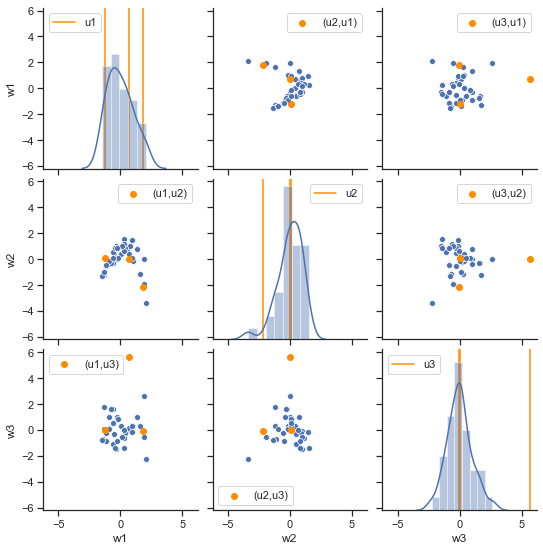

In [8]:
data.plot_u_w_pairs()

In [9]:
print(data)
model = setup_model(data)

This SepiaData instance implies the following:
This is a simulator and obs model, sim y dimension 572, obs y dimension ragged
n  =     3 (number of observed data)
m  =    36 (number of simulated data)
p  =     1 (number of inputs)
q  =     2 (number of additional simulation inputs to calibrate)
pu =     3 (transformed response dimension)
pv =    24 (transformed discrepancy dimension)



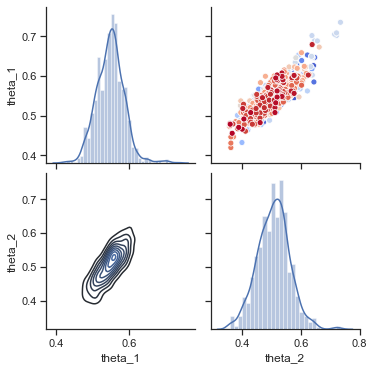

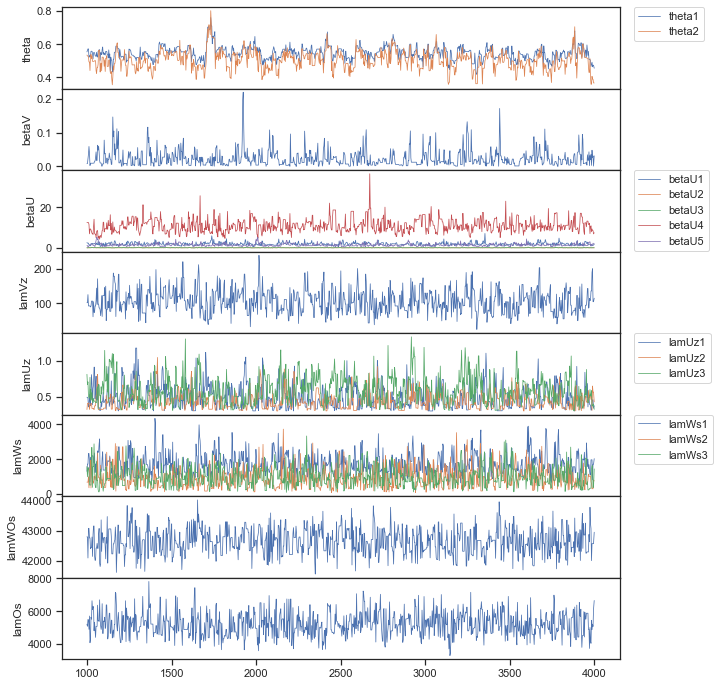

In [10]:
cachefile_name='neddermeyer.pkl'
import os.path
import pickle
if os.path.isfile(cachefile_name):
   model=pickle.load(open(cachefile_name, "rb" ))
else:
    model.tune_step_sizes(50, 20)
    model.do_mcmc(5000)
    pickle.dump(model, open( cachefile_name, "w+b" ))

samples_dict = {p.name: p.mcmc_to_array(trim=1000) for p in model.params.mcmcList}
SepiaPlot.theta_pairs(samples_dict)
SepiaPlot.mcmc_trace(samples_dict,start=1000,n_to_plot=1000,max_print=5)

In [11]:
model.verbose=True
from sepia.SepiaPredict import SepiaEmulatorPrediction 
pred_samples=model.get_samples(numsamples=25)
pred=SepiaEmulatorPrediction(x_pred=x_obs, samples=pred_samples, model=model)

Predicted emulator principle component weights for each of the three experimental inputs x

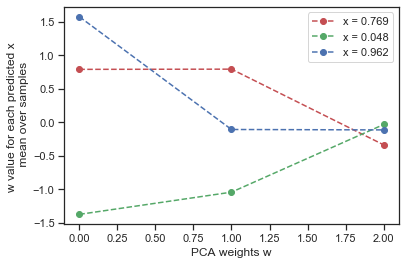

In [12]:
predw=pred.get_w()
plt.figure()
colors = ['r','g','b']
for i in range(3):
    plt.plot(np.mean(predw,0).T[:,i],'--o',c=colors[i],label='x = {}'.format(np.round(float(x_obs[i]),3)))
plt.legend()
plt.xlabel('PCA weights w')
plt.ylabel('w value for each predicted x \n mean over samples')
plt.show()

Predicted Simulator Output

In [21]:
pred_time, pred_phi = np.meshgrid(time,phi)
predy=pred.get_y_native()
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
import pandas as pd
init_notebook_mode()

fig = make_subplots(rows=1, cols=3,
                   specs=[[{'is_3d': True}, {'is_3d': True},{'is_3d': True}]],
                   subplot_titles=('Experiment 1',  'Experiment 2', 'Experiment 3'),
                   shared_xaxes=True)
for i in range(3):
    fig.add_trace(go.Scatter3d(x = y_ind_obs[i][:,0], y = y_ind_obs[i][:,1], z = y_obs[i],
                     mode = 'markers', marker = dict(size = 5,
                     color = 'blue', # set color to an array/list of desired values
                     colorscale = 'Viridis'),text=["time","phi",'y']),
             row=1,col=i+1)
    fig.add_trace(go.Surface(x = pred_time, y = pred_phi, z = np.mean(predy,0)[i,:].reshape(22,26,order='F').T,
                   opacity =.5,showscale=False),
             row=1,col=i+1)

fig['layout']['annotations'][0].update()
fig.update_traces(showlegend=False)
fig.update_layout(height=500, width=1000,
                  title_text="Simulator Response")
#print(fig['layout']['annotations'][0])
#layout = go.Layout(title = 'Predicted y')
iplot(fig)



Predicted 

In [14]:
model.data.obs_data.orig_y_sd = data.obs_data.orig_y_sd # BUG: must explicitly set obs_data.orig_y_sd again in model object
from sepia.SepiaPredict import SepiaFullPrediction
predfull = []
for i in range(3):
    predfull.append(SepiaFullPrediction(x_pred=np.atleast_2d(x_obs[i]), samples=pred_samples, model=model))

In [19]:
pred_d = []
pred_sim = []
pred_obs = []
for i in range(3):
    pred_d.append(predfull[i].get_discrepancy_simgrid())
    pred_sim.append(predfull[i].get_ysim_native())
    pred_obs.append(predfull[i].get_yobs_native(i))

In [20]:
# simulator
fig = make_subplots(rows=1, cols=3,
                   specs=[[{'is_3d': True}, {'is_3d': True},{'is_3d': True}]],
                   subplot_titles=('Experiment 1',  'Experiment 2', 'Experiment 3'),
                   shared_xaxes=True)
for i in range(3):
    fig.add_trace(go.Scatter3d(x = y_ind_obs[i][:,0], y = y_ind_obs[i][:,1], z = y_obs[i],
                     mode = 'markers', marker = dict(size = 5,
                     color = 'blue', # set color to an array/list of desired values
                     colorscale = 'Viridis'),text=["time","phi",'y']),
             row=1,col=i+1)
    fig.add_trace(go.Surface(x = pred_time, y = pred_phi, z = np.mean(pred_sim[i],0).reshape(26,22),
                   opacity =.5,showscale=False),
             row=1,col=i+1)
fig.update_traces(showlegend=False)    
fig['layout']['annotations'][0].update()
#print(fig['layout']['annotations'][0])
#layout = go.Layout(title = 'Predicted y')
fig.update_layout(height=500, width=1000,
                  title_text="Simulator Response")
fig.update_layout(
        scene1 = {"aspectratio": {"x": .75, "y": .75, "z": .75}},
        scene2 = {"aspectratio": {"x": .75, "y": .75, "z": .75}},
        scene3 = {"aspectratio": {"x": .75, "y": .75, "z": .75}})
iplot(fig)

# discrepancy
fig = make_subplots(rows=1, cols=3,
                   specs=[[{'is_3d': True}, {'is_3d': True},{'is_3d': True}]],
                   subplot_titles=('Experiment 1',  'Experiment 2', 'Experiment 3'),
                   shared_xaxes=True)
for i in range(3):
    fig.add_trace(go.Surface(x = pred_time, y = pred_phi,
                             z = np.mean(pred_d[i],0).reshape(pred_time.shape),
                             opacity =.5,showscale=False),
                  row=1,col=i+1)
fig.update_traces(showlegend=False)
fig.update_layout(height=500, width=1000,
                  title_text="Discrepancy")

fig.update_layout(
        scene1 = {'camera_eye': {"x": -1, "y": .75, "z": 0.5},
            "aspectratio": {"x": .5, "y": .5, "z": 0.25}},
        scene2 = {'camera_eye': {"x": -1, "y": .75, "z": 0.5},
            "aspectratio": {"x": .5, "y": .5, "z": 0.25}},
        scene3 = {'camera_eye': {"x": -1, "y": .75, "z": 0.5},
            "aspectratio": {"x": .5, "y": .5, "z": 0.25}})
iplot(fig)

# emulator + discrepancy
fig = make_subplots(rows=1, cols=3,
                   specs=[[{'is_3d': True}, {'is_3d': True},{'is_3d': True}]],
                   subplot_titles=('Experiment 1',  'Experiment 2', 'Experiment 3'),
                   shared_xaxes=True)
for i in range(3):
    fig.add_trace(go.Scatter3d(x = y_ind_obs[i][:,0], y = y_ind_obs[i][:,1], z = y_obs[i],
                     mode = 'markers', marker = dict(size = 5,
                     color = 'blue', # set color to an array/list of desired values
                     colorscale = 'Viridis'),text=["time","phi",'y']),
             row=1,col=i+1)
    fig.add_trace(go.Surface(x = pred_time, y = pred_phi,
                             z = np.mean(pred_sim[i],0).reshape(26,22)+np.mean(pred_d[i],0).reshape(pred_time.shape),
                             opacity =.5,showscale=False),
                  row=1,col=i+1)
fig.update_traces(showlegend=False)    
fig.update_layout(height=500, width=1000,
                  title_text="Simulator + Discrepancy")
fig.update_layout(
        scene1 = {"aspectratio": {"x": .75, "y": .75, "z": .75}},
        scene2 = {"aspectratio": {"x": .75, "y": .75, "z": .75}},
        scene3 = {"aspectratio": {"x": .75, "y": .75, "z": .75}})
iplot(fig)